# Importing Libraries

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Gotta download the heatmapzzzz

import pandas as pd
import numpy as np

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import dask.dataframe as dd
import plotly.express as px
import datetime as dt

# from heatmap import heatmap, corrplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Datasets

In [0]:
# Uncomment and run if you haven't unzipped the data yet
# !unzip "/content/gdrive/My Drive/Data Mining/DataSet.zip" -d "/content/gdrive/My Drive/Data Mining/unzipped/"

In [0]:
file_directory = "/content/gdrive/My Drive/Data Mining/unzipped/dataset/"

In [0]:
all_files = os.listdir(file_directory)
len(all_files)

90

In [0]:
dyn_files = ['Copy of Power-Networks-LCL-June2015(withAcornGps)v2_168.csv', 'Copy of Power-Networks-LCL-June2015(withAcornGps)v2_167.csv', 'Copy of Power-Networks-LCL-June2015(withAcornGps)v2_166.csv']

In [0]:
df_list = []
customer = {}
# counter = 0

for filename in tqdm(dyn_files, ncols=100):
  df = pd.read_csv(os.path.join(file_directory, filename))
  df.drop(columns=['Acorn'], inplace=True)
  df = df[df['KWH/hh (per half hour) '] != 'Null']
  df['KWH/hh (per half hour) '] = df['KWH/hh (per half hour) '].astype(float)
  df['DateTime'] = pd.to_datetime(df['DateTime']) #uncomment if you want both 
#   df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date #keeping date only in DateTime columns
#   df.drop(columns=["stdorToU"], inplace=True)
  df_list.append(df)

df = pd.concat(df_list)
# df.columns=['LCLid', 'DateTime', 'KWH/hh', 'Acorn Grouped']
df.columns=['LCLid', 'stdorToU', 'DateTime', 'KWH/hh', 'Acorn Grouped']
df.head()

In [0]:
df.shape

In [0]:
df_list = []
customer = {}
# counter = 0
for filename in tqdm(all_files, ncols=100):
  df = pd.read_csv(os.path.join(file_directory, filename))
  df.drop(columns=['Acorn'], inplace=True)
  df = df[df['KWH/hh (per half hour) '] != 'Null']
  df['KWH/hh (per half hour) '] = df['KWH/hh (per half hour) '].astype(float)
  df['DateTime'] = pd.to_datetime(df['DateTime']) #uncomment if you want both 
#   df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date #keeping date only in DateTime columns
  df.drop(columns=["stdorToU"], inplace=True)
  df_list.append(df)

100%|███████████████████████████████████████████████████████████████| 90/90 [03:01<00:00,  2.01s/it]


In [0]:
df = pd.concat(df_list)

In [0]:
df.head()

,LCLid,DateTime,KWH/hh (per half hour),Acorn_grouped
0,MAC000002,2012-10-12 00:30:00,0.0,Affluent
1,MAC000002,2012-10-12 01:00:00,0.0,Affluent
2,MAC000002,2012-10-12 01:30:00,0.0,Affluent
3,MAC000002,2012-10-12 02:00:00,0.0,Affluent
4,MAC000002,2012-10-12 02:30:00,0.0,Affluent


In [0]:
# df.columns=['LCLid', 'Std or ToU', 'DateTime', 'KWH/hh', 'Acorn Grouped']
df.columns=['LCLid', 'DateTime', 'KWH/hh', 'Acorn Grouped']
# df.columns=['LCLid', 'DateTime', 'KWH/hh']
df.head()


,LCLid,DateTime,KWH/hh,Acorn Grouped
0,MAC000002,2012-10-12 00:30:00,0.0,Affluent
1,MAC000002,2012-10-12 01:00:00,0.0,Affluent
2,MAC000002,2012-10-12 01:30:00,0.0,Affluent
3,MAC000002,2012-10-12 02:00:00,0.0,Affluent
4,MAC000002,2012-10-12 02:30:00,0.0,Affluent


In [0]:

# Delete the temporary df_list to free up some RAM
del df_list[:]
del df_list
df_list = None

In [0]:
# df.to_pickle("/content/gdrive/My Drive/Data Mining/completedata.pkl")

In [0]:
if(len(all_files) == 90):
    print("Good to go")
else:
    print("You might wanna check the data loading, not all 168 files are there")

Good to go


# Preprocessing

### Std Group

In [0]:
# df['Std or ToU'].unique()
is_Std =  df['Std or ToU']=='Std'
Std_Customers = df[is_Std]
Std_Customers = Std_Customers.drop(columns=['Std or ToU'])


Std_Customers.head()

,LCLid,Std or ToU,DateTime,KWH/hh,Acorn Grouped
0,MAC000002,Std,2012-10-12 00:30:00,0.0,Affluent
1,MAC000002,Std,2012-10-12 01:00:00,0.0,Affluent
2,MAC000002,Std,2012-10-12 01:30:00,0.0,Affluent
3,MAC000002,Std,2012-10-12 02:00:00,0.0,Affluent
4,MAC000002,Std,2012-10-12 02:30:00,0.0,Affluent


In [0]:
Std_Customers

array(['Affluent', 'Adversity', 'Comfortable', 'ACORN-U'], dtype=object)

In [0]:
Std_Customers.to_csv("/content/gdrive/My Drive/Data Mining/completeStdCustomers.csv")

### Std Customers per day 

In [0]:
Std_Customers.head()

,LCLid,DateTime,KWH/hh,Acorn Grouped
0,MAC000002,2012-10-12,0.0,Affluent
1,MAC000002,2012-10-12,0.0,Affluent
2,MAC000002,2012-10-12,0.0,Affluent
3,MAC000002,2012-10-12,0.0,Affluent
4,MAC000002,2012-10-12,0.0,Affluent


In [0]:
Std_Customers['DateTime'] = pd.to_datetime(Std_Customers['DateTime']).dt.date #keeping date only in DateTime columns


In [0]:
# Std_Customers['Date'] = Std_Customers['DateTime'].dt.date
perDay_StdCustomers = Std_Customers.groupby(['LCLid','DateTime']).agg({'KWH/hh': 'sum'})

# del [[Std_Customers]]

perDay_StdCustomers = perDay_StdCustomers.reset_index()
# perDay_df.to_csv("/content/gdrive/My Drive/Data Mining/perDay_df.csv")

perDay_StdCustomers.head()


,LCLid,DateTime,KWH/hh
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


In [0]:
perDay_StdCustomers.to_csv("/content/gdrive/My Drive/Data Mining/perDay_StdCustomers.csv")

### ToU Group

In [0]:
# df['Std or ToU'].unique()
is_ToU =  df['Std or ToU']=='ToU'
ToU_Customers = df[is_ToU]
ToU_Customers = ToU_Customers.drop(columns=['Std or ToU'])

ToU_Customers.head()

,LCLid,DateTime,KWH/hh,Acorn Grouped
0,MAC000470,2013-07-25 19:00:00,0.227,Comfortable
1,MAC000470,2013-07-25 19:30:00,0.222,Comfortable
2,MAC000470,2013-07-25 20:00:00,0.240,Comfortable
3,MAC000470,2013-07-25 20:30:00,0.237,Comfortable
4,MAC000470,2013-07-25 21:00:00,0.296,Comfortable


In [0]:
ToU_Customers.to_csv("/content/gdrive/My Drive/Data Mining/completeToUCustomers.csv")

In [0]:
del [[ToU_Customers]]

In [0]:
del [[df]]
gc.collect()
df=pd.DataFrame()

### Per Day Data Frame


In [0]:
perDay_df = df.groupby(['LCLid','DateTime']).agg({'KWH/hh': 'sum'})
perDay_df = perDay_df.reset_index()

# perDay_df.to_csv("/content/gdrive/My Drive/Data Mining/perDay_df.csv")

perDay_df.head()

,LCLid,DateTime,KWH/hh
0,MAC000002,2011-11-23,0.0
1,MAC000002,2011-11-24,0.0
2,MAC000002,2011-11-25,0.0
3,MAC000002,2011-11-26,0.0
4,MAC000002,2011-11-27,0.0


In [0]:
perDay_df.to_csv("/content/gdrive/My Drive/Data Mining/perDay_df.csv")

In [0]:
perDay_df = None

In [0]:
perDay_df.head()

### Unique Customers

In [0]:
df_customer = df.drop(columns=['DateTime','KWH/hh'])
print(df_customer.shape)
df_customer = df_customer.drop_duplicates()
print(df_customer.head(20))
df_customer = df_customer.reset_index(drop=True, inplace=True)

print(len(df_customer))
# df.to_csv("/content/gdrive/My Drive/Data Mining/uniqueCustomer_df.csv")


(167926914, 3)
            LCLid Std or ToU Acorn Grouped
0       MAC000002        Std      Affluent
24158   MAC000003        Std     Adversity
59627   MAC000004        Std      Affluent
91304   MAC000006        Std     Adversity
127765  MAC000007        Std   Comfortable
152811  MAC000008        Std   Comfortable
178824  MAC000009        Std     Adversity
204062  MAC000010        Std   Comfortable
229111  MAC000011        Std     Adversity
252816  MAC000012        Std      Affluent
277486  MAC000013        Std     Adversity
307100  MAC000016        Std     Adversity
326624  MAC000018        Std      Affluent
365706  MAC000019        Std     Adversity
404777  MAC000020        Std   Comfortable
443856  MAC000021        Std      Affluent
482935  MAC000022        Std     Adversity
522007  MAC000023        Std       ACORN-U
561076  MAC000024        Std      Affluent
600103  MAC000025        Std     Adversity


TypeError: ignored

In [0]:
df_customer.head()

AttributeError: ignored

# Loading data


In [26]:
file_directory = "/content/gdrive/My Drive/Data Mining/unzipped/"

df_tariff = pd.read_csv(os.path.join(file_directory,"Tariffs.csv"))
df_tariff.head()

,TariffDateTime,Tariff
0,1/1/2013 0:00,Normal
1,1/1/2013 0:30,Normal
2,1/1/2013 1:00,Normal
3,1/1/2013 1:30,Normal
4,1/1/2013 2:00,Normal


In [27]:
df_tariff['TariffDateTime'] = pd.to_datetime(df_tariff['TariffDateTime'])
# df_tariff["Day"] = df_tariff["TariffDateTime"].apply(lambda x: x.day)
# df_tariff["Month"] = df_tariff["TariffDateTime"].apply(lambda x: x.month)
# df_tariff["Hour"] = df_tariff["TariffDateTime"].apply(lambda x: x.hour)
# df_tariff["minute"] = df_tariff["TariffDateTime"].apply(lambda x: x.minute)
# df_tariff.head()
df_tariff['TariffDateTime'] = df_tariff['TariffDateTime'].apply(lambda x: str(x.minute) + '-' + str(x.hour) + '-' + str(x.day) + '-' + str(x.month))
df_tariff.set_index('TariffDateTime', inplace=True)
df_tariff.head()
df_tariff

,Tariff
TariffDateTime,
0-0-1-1,Normal
30-0-1-1,Normal
0-1-1-1,Normal
30-1-1-1,Normal
0-2-1-1,Normal
...,...
30-21-31-12,Normal
0-22-31-12,Normal
30-22-31-12,Normal


In [0]:
df = pd.read_pickle("/content/gdrive/My Drive/Data Mining/completedata.pkl")

In [0]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [0]:
df2 = pd.read_pickle("/content/gdrive/My Drive/Data Mining/dynamicdatapickle.pkl")

In [0]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

In [0]:
def fetchtype(x):
  key = str(x.minute) + '-' + str(x.hour) + '-' + str(x.day) + '-' + str(x.month)
  try:
    val_df = df_tariff.loc[key,'Tariff']
    return val_df
  except KeyError:
    return np.nan

In [33]:
len(df2)

2932384

In [0]:
df2["Std type"] = df2["DateTime"].apply(fetchtype)

# EDA

### Average energy usage in each month by each customer group (standard)

In [0]:
groupby = df.groupby(['Acorn Grouped',pd.Grouper(key="DateTime",freq='M')])["KWH/hh"].mean()

In [0]:
groupby= groupby.reset_index()

In [0]:
groupby.head()

,Acorn Grouped,DateTime,KWH/hh
0,ACORN-U,2011-12-31,0.215157
1,ACORN-U,2012-01-31,0.255847
2,ACORN-U,2012-02-29,0.217744
3,ACORN-U,2012-03-31,0.255636
4,ACORN-U,2012-04-30,0.196081


In [0]:
fig = px.line(groupby, x="DateTime", y="KWH/hh", color="Acorn Grouped")
fig.show()

In [0]:
del groupby

In [0]:
df.dtypes

LCLid                    object
DateTime         datetime64[ns]
KWH/hh                  float64
Acorn Grouped            object
dtype: object

### Average energy usage in each month by each customer group (dynamic)

In [0]:
groupby = df2.groupby(['Acorn Grouped',pd.Grouper(key="DateTime",freq='M')])["KWH/hh"].mean()

In [0]:
groupby= groupby.reset_index()

In [0]:
groupby.head()

,Acorn Grouped,DateTime,KWH/hh
0,ACORN-,2012-04-30,0.143661
1,ACORN-,2012-05-31,0.127899
2,ACORN-,2012-06-30,0.156101
3,ACORN-,2012-07-31,0.157958
4,ACORN-,2012-08-31,0.150028


In [0]:
fig = px.line(groupby, x="DateTime", y="KWH/hh", color="Acorn Grouped")
fig.show()

In [0]:
del groupby

### Average energy usage by time of day (If Any single day) (Standard user)

In [0]:
df_eu = df
df_eu["DateTime"] = df_eu["DateTime"].apply(lambda x: x.hour)
df_eu.head()

,LCLid,DateTime,KWH/hh,Acorn Grouped
0,MAC000002,0,0.0,Affluent
1,MAC000002,1,0.0,Affluent
2,MAC000002,1,0.0,Affluent
3,MAC000002,2,0.0,Affluent
4,MAC000002,2,0.0,Affluent


In [0]:
groupby = df_eu.groupby(['Acorn Grouped', 'DateTime'])["KWH/hh"].mean()

In [0]:
groupby = groupby.reset_index()
groupby.head()

,Acorn Grouped,DateTime,KWH/hh
0,ACORN-U,0,0.211220
1,ACORN-U,1,0.216210
2,ACORN-U,2,0.197056
3,ACORN-U,3,0.185939
4,ACORN-U,4,0.178377


In [0]:
fig = px.line(groupby, x="DateTime", y="KWH/hh", color="Acorn Grouped")
fig.show()

In [0]:
del df_eu
del groupby

In [0]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

### Average energy usage by time of day (If Any single day) (Dynamic user)

In [0]:
df_eu = df2.copy()
df_eu["DateTime"] = df_eu["DateTime"].apply(lambda x: x.hour)
df_eu.head()

,LCLid,stdorToU,DateTime,KWH/hh,Acorn Grouped,Std type
0,MAC005470,ToU,21,0.180,Affluent,Normal
1,MAC005470,ToU,21,0.104,Affluent,Normal
2,MAC005470,ToU,22,0.118,Affluent,Normal
3,MAC005470,ToU,22,0.154,Affluent,Normal
4,MAC005470,ToU,23,0.026,Affluent,Normal


In [0]:
groupby = df_eu.groupby(['Acorn Grouped', 'DateTime'])["KWH/hh"].mean()

In [0]:
groupby = groupby.reset_index()
groupby.head()

,Acorn Grouped,DateTime,KWH/hh
0,ACORN-,0,0.150613
1,ACORN-,1,0.123159
2,ACORN-,2,0.105162
3,ACORN-,3,0.100544
4,ACORN-,4,0.101825


In [0]:
fig = px.line(groupby, x="DateTime", y="KWH/hh",color="Acorn Grouped")
fig.show()

In [0]:
del df_eu
del groupby

In [0]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

### Average energy usage by day of week (Standard)

In [0]:
df_eu = df
df_eu["DateTime"] = df_eu["DateTime"].apply(lambda x: x.weekday())
df_eu.head()

,LCLid,DateTime,KWH/hh,Acorn Grouped
0,MAC000002,4,0.0,Affluent
1,MAC000002,4,0.0,Affluent
2,MAC000002,4,0.0,Affluent
3,MAC000002,4,0.0,Affluent
4,MAC000002,4,0.0,Affluent


In [0]:
groupby = df_eu.groupby(['Acorn Grouped', 'DateTime'])["KWH/hh"].mean()

In [0]:
groupby = groupby.reset_index()
groupby.head()

,Acorn Grouped,DateTime,KWH/hh
0,ACORN-U,0,0.242299
1,ACORN-U,1,0.231710
2,ACORN-U,2,0.238122
3,ACORN-U,3,0.242256
4,ACORN-U,4,0.235338


In [0]:
fig = px.line(groupby, x="DateTime", y="KWH/hh", color="Acorn Grouped")
fig.show()

In [0]:
del df_eu
del groupby

### Average energy usage by day of week (Dynamic)

In [0]:
# df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df_eu = df2
df_eu["DateTime"] = df_eu["DateTime"].apply(lambda x: x.weekday())
df_eu.head()

,LCLid,stdorToU,DateTime,KWH/hh,Acorn Grouped,Std type
0,MAC005470,ToU,2,0.180,Affluent,Normal
1,MAC005470,ToU,2,0.104,Affluent,Normal
2,MAC005470,ToU,2,0.118,Affluent,Normal
3,MAC005470,ToU,2,0.154,Affluent,Normal
4,MAC005470,ToU,2,0.026,Affluent,Normal


In [0]:
groupby = df_eu.groupby(['Acorn Grouped', 'DateTime'])["KWH/hh"].mean()

In [0]:
groupby = groupby.reset_index()
groupby.head()

,Acorn Grouped,DateTime,KWH/hh
0,ACORN-,0,0.154205
1,ACORN-,1,0.157095
2,ACORN-,2,0.153401
3,ACORN-,3,0.152727
4,ACORN-,4,0.159792


In [0]:
groupby["DateTime"].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [0]:
fig = px.line(groupby, x="DateTime", y="KWH/hh", color="Acorn Grouped")
fig.show()

In [0]:
del df_eu

In [0]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

### Loading and Required DataFrames


In [0]:
df['KWH/hh'] = df['KWH/hh'].astype(float)
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
df.dtypes

LCLid             object
DateTime          object
KWH/hh           float64
Acorn Grouped     object
dtype: object

In [0]:
unique_customer = df.drop(['DateTime', 'KWH/hh'],1)
unique_customer = unique_customer.drop_duplicates().reset_index()
unique_customer = unique_customer.drop('index',1)

print("Unique standard customers -> "+ str(len(unique_customer)))
unique_customer.head()

Unique standard customers -> 3043


,LCLid,Acorn Grouped
0,MAC000002,Affluent
1,MAC000003,Adversity
2,MAC000004,Affluent
3,MAC000006,Adversity
4,MAC000007,Comfortable


In [0]:
#Unique dynamic customers
unique_dynamicCustomer = df2.drop(['DateTime', 'KWH/hh','stdorToU'],1)
unique_dynamicCustomer = unique_dynamicCustomer.drop_duplicates().reset_index()
unique_dynamicCustomer = unique_dynamicCustomer.drop('index',1)

unique_dynamicCustomer.head()

,LCLid,Acorn Grouped
0,MAC005470,Affluent
1,MAC005473,Adversity
2,MAC005474,Adversity
3,MAC005477,Comfortable
4,MAC005482,Comfortable


In [0]:
df2_copy = df2.copy()
df2_copy['KWH/hh'] = df2_copy['KWH/hh'].astype(float)
df2_copy['DateTime'] = pd.to_datetime(df2_copy['DateTime']).dt.date
# df2_copy.dtypes



perDay_df2 = df2_copy.groupby(['LCLid','DateTime']).agg({'KWH/hh': 'sum'})
perDay_df2 = perDay_df2.reset_index()

perDay_df2_withAcorn = pd.merge(perDay_df2, unique_dynamicCustomer, on='LCLid')

perDay_df2_withAcorn.head(10)

,LCLid,DateTime,KWH/hh,Acorn Grouped
0,MAC005157,2012-12-09,4.672,Adversity
1,MAC005157,2012-12-10,14.432,Adversity
2,MAC005157,2012-12-11,6.155,Adversity
3,MAC005157,2012-12-12,13.323,Adversity
4,MAC005157,2012-12-13,7.199,Adversity
5,MAC005157,2012-12-14,7.128,Adversity
6,MAC005157,2012-12-15,5.661,Adversity
7,MAC005157,2012-12-16,12.073,Adversity
8,MAC005157,2012-12-17,6.710,Adversity
9,MAC005157,2012-12-18,5.769,Adversity


In [0]:
perDay_df = df.groupby(['LCLid','DateTime']).agg({'KWH/hh': 'sum'})
perDay_df = perDay_df.reset_index()

perDay_df.head(10)

,LCLid,DateTime,KWH/hh
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769
5,MAC000002,2012-10-17,10.885
6,MAC000002,2012-10-18,10.751
7,MAC000002,2012-10-19,8.431
8,MAC000002,2012-10-20,17.578
9,MAC000002,2012-10-21,24.490


In [0]:
print("Unique standard customers -> "+ str(len(unique_customer)))
print("Unique dyanamic customers -> "+ str(len(unique_dynamicCustomer)))

Unique standard customers -> 3043
Unique dyanamic customers -> 90


,Acorn Grouped,KWH/hh
0,ACORN-U,1.411661e+05
1,Adversity,5.781553e+06
2,Affluent,7.913093e+06
3,Comfortable,5.384393e+06


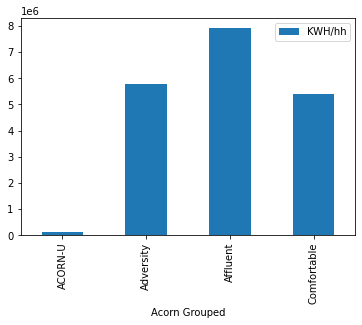

In [0]:
#group total consumption of each Acorn Group
# df.groupby(['Name', 'Fruit'])['Number'].agg('sum')
# df.groupby('Acorn Grouped').KWH/hh.sum().plot(kind= 'bar')
df.groupby(['Acorn Grouped']).agg({'KWH/hh': 'sum'}).plot(kind='bar')


Acorn_group_df = df.groupby(['Acorn Grouped']).agg({'KWH/hh': 'sum'})
Acorn_group_df = Acorn_group_df.reset_index()
Acorn_group_df.head()

  Acorn Grouped         KWH/hh
0        ACORN-    4151.697000
1     Adversity   89610.081002
2      Affluent  347239.190999
3   Comfortable  161712.102991


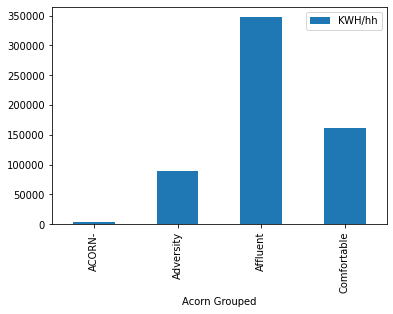

In [0]:
Acorn_group_df = df2.groupby(['Acorn Grouped']).agg({'KWH/hh': 'sum'})
Acorn_group_df = Acorn_group_df.reset_index()
print(Acorn_group_df.head())

df2.groupby(['Acorn Grouped']).agg({'KWH/hh': 'sum'}).plot(kind='bar')

In [0]:
#change DateTime attribute to category and label encode in perDay_df

copy_perDay_time_lc = perDay_df.copy()
copy_perDay_time_lc['DateTime'] = copy_perDay_time_lc['DateTime'].astype('category')
copy_perDay_time_lc['DateTime'] = copy_perDay_time_lc['DateTime'].cat.codes

copy_perDay_time_lc.head()

,LCLid,DateTime,KWH/hh
0,MAC000002,324,7.098
1,MAC000002,325,11.087
2,MAC000002,326,13.223
3,MAC000002,327,10.257
4,MAC000002,328,9.769


### Date and KWH/hh correlation


In [0]:
perDay_df_withAcorn = pd.merge(perDay_df, unique_customer, on='LCLid')

perDay_df_withAcorn['Acorn Grouped'] = perDay_df_withAcorn['Acorn Grouped'].astype('category')
perDay_df_withAcorn['Acorn Grouped'] = perDay_df_withAcorn['Acorn Grouped'].cat.codes

perDay_df_withAcorn['DateTime'] = perDay_df_withAcorn['DateTime'].astype('category')
perDay_df_withAcorn['DateTime'] = perDay_df_withAcorn['DateTime'].cat.codes

print(perDay_df_withAcorn.head())

pearson_corr = (perDay_df_withAcorn.corr(method ='pearson'))
kendall_corr = (perDay_df_withAcorn.corr(method ='kendall'))

print(pearson_corr)
print(kendall_corr)

       LCLid  DateTime  KWH/hh  Acorn Grouped
0  MAC000002       324   7.098              2
1  MAC000002       325  11.087              2
2  MAC000002       326  13.223              2
3  MAC000002       327  10.257              2
4  MAC000002       328   9.769              2
               DateTime    KWH/hh  Acorn Grouped
DateTime       1.000000  0.022924       0.004172
KWH/hh         0.022924  1.000000       0.087780
Acorn Grouped  0.004172  0.087780       1.000000
               DateTime    KWH/hh  Acorn Grouped
DateTime       1.000000  0.016265       0.003610
KWH/hh         0.016265  1.000000       0.081844
Acorn Grouped  0.003610  0.081844       1.000000


In [0]:
perDay_df2_withAcorn['Acorn Grouped'] = perDay_df2_withAcorn['Acorn Grouped'].astype('category')
perDay_df2_withAcorn['Acorn Grouped'] = perDay_df2_withAcorn['Acorn Grouped'].cat.codes

perDay_df2_withAcorn['DateTime'] = perDay_df2_withAcorn['DateTime'].astype('category')
perDay_df2_withAcorn['DateTime'] = perDay_df2_withAcorn['DateTime'].cat.codes

print(perDay_df2_withAcorn.head())

pearson_corr = (perDay_df2_withAcorn.corr(method ='pearson'))
kendall_corr = (perDay_df2_withAcorn.corr(method ='kendall'))

print(pearson_corr)
print(kendall_corr)

       LCLid  DateTime  KWH/hh  Acorn Grouped
0  MAC005157       311   4.672              1
1  MAC005157       312  14.432              1
2  MAC005157       313   6.155              1
3  MAC005157       314  13.323              1
4  MAC005157       315   7.199              1
               DateTime    KWH/hh  Acorn Grouped
DateTime       1.000000  0.000314      -0.023189
KWH/hh         0.000314  1.000000       0.072604
Acorn Grouped -0.023189  0.072604       1.000000
               DateTime    KWH/hh  Acorn Grouped
DateTime       1.000000  0.000307      -0.015952
KWH/hh         0.000307  1.000000       0.067127
Acorn Grouped -0.015952  0.067127       1.000000


### Boxplot of the Acorn groups with consumption


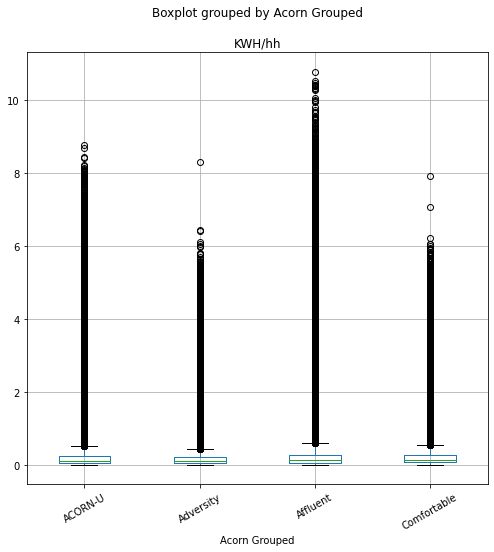

In [0]:
df.boxplot('KWH/hh','Acorn Grouped',rot = 30,figsize=(8,8))

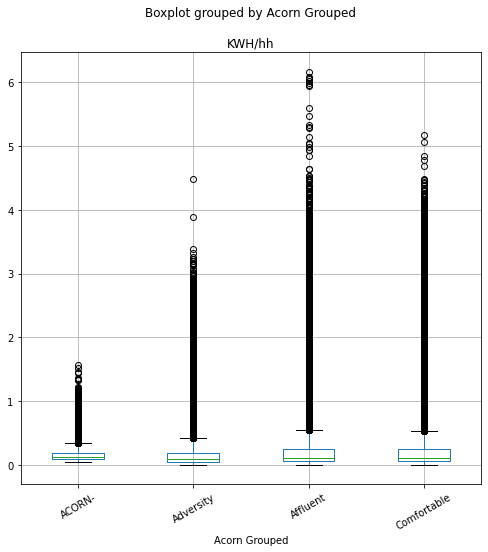

In [0]:
df2.boxplot('KWH/hh','Acorn Grouped',rot = 30,figsize=(8,8))

### Frequency Distribution of Categorical Feature Acorn Grouped

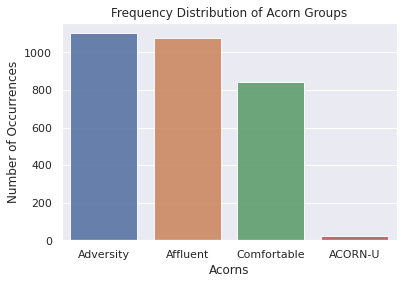

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
acorn_count = unique_customer['Acorn Grouped'].value_counts()
sns.set(style="darkgrid")
sns.barplot(acorn_count.index, acorn_count.values, alpha=0.9)
plt.title('Frequency Distribution of Acorn Groups')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Acorns', fontsize=12)
plt.show()

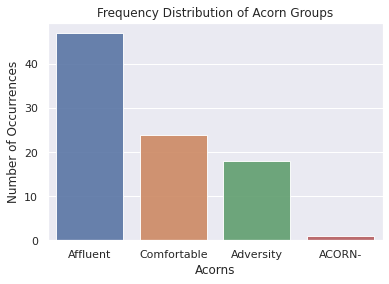

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
acorn_count = unique_dynamicCustomer['Acorn Grouped'].value_counts()
sns.set(style="darkgrid")
sns.barplot(acorn_count.index, acorn_count.values, alpha=0.9)
plt.title('Frequency Distribution of Acorn Groups')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Acorns', fontsize=12)
plt.show()

## Dilawer

In [0]:
idx = df2['Std type'].isna()
df2[idx].head()

,LCLid,stdorToU,DateTime,KWH/hh,Acorn Grouped,Std type
33804,MAC005291,ToU,2012-02-29 00:00:00,0.240,Affluent,NaN
33805,MAC005291,ToU,2012-02-29 00:30:00,0.172,Affluent,NaN
33806,MAC005291,ToU,2012-02-29 01:00:00,0.090,Affluent,NaN
33807,MAC005291,ToU,2012-02-29 01:30:00,0.074,Affluent,NaN
33808,MAC005291,ToU,2012-02-29 02:00:00,0.059,Affluent,NaN


In [0]:
df2['Std type'].ffill(inplace=True)
print(df2.isna().sum())
df2[idx].head()

LCLid            0
stdorToU         0
DateTime         0
KWH/hh           0
Acorn Grouped    0
Std type         0
dtype: int64


,LCLid,stdorToU,DateTime,KWH/hh,Acorn Grouped,Std type
33804,MAC005291,ToU,2012-02-29 00:00:00,0.240,Affluent,Normal
33805,MAC005291,ToU,2012-02-29 00:30:00,0.172,Affluent,Normal
33806,MAC005291,ToU,2012-02-29 01:00:00,0.090,Affluent,Normal
33807,MAC005291,ToU,2012-02-29 01:30:00,0.074,Affluent,Normal
33808,MAC005291,ToU,2012-02-29 02:00:00,0.059,Affluent,Normal


In [0]:
df2['Hour'] = df2['DateTime'].apply(lambda x: x.hour)

In [0]:
vc = df2.groupby('Hour')['Std type'].value_counts()
vc

Hour  Std type
0     Normal      107410
      Low          13534
      High          3165
1     Normal      105875
      Low          12970
                   ...  
22    High         11340
      Low           6745
23    Normal      106045
      Low          12976
      High          3166
Name: Std type, Length: 72, dtype: int64

In [0]:
df_vc = pd.DataFrame(vc)
df_vc.columns=['Counts']
df_vc.reset_index(inplace=True)
fig = px.bar(df_vc, x='Hour', y='Counts', color='Std type')
fig.show()

In [0]:
g_std = df.groupby(pd.Grouper(key='DateTime',freq='1M'))

In [0]:
# STD Usage
std_customers = g_std['LCLid'].nunique()
std_usage = (g_std['KWH/hh'].sum() * 14.228 * 2) / std_customers 
# std_usage

DateTime
2011-11-30     1250.293856
2011-12-31     9143.496475
2012-01-31    11562.902151
2012-02-29    10542.981791
2012-03-31     7129.576854
2012-04-30     5485.618616
2012-05-31     6175.810170
2012-06-30     6703.594145
2012-07-31     7260.035121
2012-08-31     7218.475096
2012-09-30     7190.802491
2012-10-31     8695.377363
2012-11-30     9825.790794
2012-12-31    11006.893273
2013-01-31    11096.902402
2013-02-28     9780.573446
2013-03-31    10588.893054
2013-04-30     8624.997659
2013-05-31     7949.293872
2013-06-30     7232.786370
2013-07-31     7224.606358
2013-08-31     7067.604429
2013-09-30     7608.788183
2013-10-31     8519.990438
2013-11-30     9499.666637
2013-12-31    10449.132981
2014-01-31    10243.273677
2014-02-28     8613.426490
Freq: M, dtype: float64

In [0]:
g_tou = df2.groupby(pd.Grouper(key='DateTime',freq='1M'))

In [0]:
def calcTariff(month_data):
  normal_data = month_data[month_data['Std type'] == 'Normal']
  low_data = month_data[month_data['Std type'] == 'Low']
  high_data = month_data[month_data['Std type'] == 'High']
  n = normal_data['KWH/hh'].sum() * 11.76 * 2
  l = low_data['KWH/hh'].sum() * 3.99 * 2
  h = high_data['KWH/hh'].sum() * 67.20 * 2
  return n+l+h
tou_usage = g_tou.apply(calcTariff) / g_tou['LCLid'].nunique()
# tou_usage 

DateTime
2012-02-29     7456.412356
2012-03-31     9839.669220
2012-04-30     6368.553780
2012-05-31     7284.858482
2012-06-30     7838.687165
2012-07-31     6028.800941
2012-08-31     5715.838937
2012-09-30     6444.739666
2012-10-31     8681.476395
2012-11-30     9755.687455
2012-12-31    12413.564521
2013-01-31    10687.294771
2013-02-28    10326.678903
2013-03-31    10553.457825
2013-04-30     7541.680719
2013-05-31     7282.950052
2013-06-30     7145.173904
2013-07-31     5650.289205
2013-08-31     5380.997184
2013-09-30     6113.248767
2013-10-31     7206.482741
2013-11-30     8733.311952
2013-12-31    10538.786225
2014-01-31     9355.329717
2014-02-28     8844.963501
dtype: float64

In [0]:
std_df = pd.DataFrame(std_usage/100)
std_df.reset_index(inplace=True)
std_df.columns=['DateTime', 'Cost (Pounds)']
std_df['Type'] = 'Std'
tou_df = pd.DataFrame(tou_usage/100)
tou_df.reset_index(inplace=True)
tou_df.columns=['DateTime', 'Cost (Pounds)']
tou_df['Type'] = 'Tou'
rate_df = pd.concat([std_df, tou_df], ignore_index=True)
fig = px.line(rate_df, x='DateTime', y='Cost (Pounds)', color='Type')
fig.show()

# Part G: Average usage by weather in DToU and STD group

In [0]:
monthly_mean_std = df.groupby(['Acorn Grouped', pd.Grouper(key='DateTime', freq='M')])['KWH/hh'].mean()
monthly_mean_std = monthly_mean_std.reset_index()

In [0]:
fig = px.line(monthly_mean_std, x='DateTime', y='KWH/hh', color='Acorn Grouped')
fig.update_layout(
    autosize = False,
    width = 1500,
    height = 500,
    title = "Average Monthly Usage for Std Groups",
)
fig.show()

In [0]:
monthly_mean_dtou = df2.groupby(['Acorn Grouped', pd.Grouper(key='DateTime', freq='M')])['KWH/hh'].mean()
monthly_mean_dtou = monthly_mean_dtou.reset_index()

In [0]:
fig = px.line(monthly_mean_dtou, x='DateTime', y='KWH/hh', color='Acorn Grouped')
fig.update_layout(
    autosize = False,
    width = 1300,
    height = 500,
    title = "Average Monthly Usage for DToU Groups",
)
fig.show()

# Average Electricity around Christmas and New Year

In [0]:
# Taking a closer look at average electricity usage for the month of December

def plot_month_average(foo_df, mean, foo_title):
    fig = px.line(foo_df, x='DateTime', y='KWH/hh')
    # Add a horizontal line at mean
    fig.update_layout(
        title = foo_title,
        shapes = [
        dict(
        type = 'line',
        xref = 'paper', x0= 0, x1= 1,
        yref = 'y', y0= mean, y1= mean,
        line =dict(dash="dashdot")
        )
    ])
    fig.show()

In [0]:
# DToU Group

t_df = df2.copy()
t_df = t_df.drop(columns=['LCLid', 'stdorToU'])
t_df['Month'] = t_df['DateTime'].dt.month
t_df['DateTime'] = pd.to_datetime(t_df['DateTime'].dt.date)
t_df = t_df.loc[t_df['Month'] == 12]
t_df = t_df.drop(columns=['Month'])
t_df_avg = t_df.groupby([pd.Grouper(key='DateTime', freq='D')])['KWH/hh'].mean()
t_df_avg = t_df_avg.dropna()
t_df_avg = t_df_avg.drop(columns=['DateTIme'])
t_df_avg = t_df_avg.to_frame()
t_df_avg  = t_df_avg.reset_index()
month_means = t_df.groupby([pd.Grouper(key='DateTime', freq='Y')])['KWH/hh'].mean()

mean_2012 = month_means.iloc[0]
mean_2013 = month_means.iloc[1]
df_2012 = t_df_avg.head(31)
df_2013 = t_df_avg.tail(31)

In [0]:
plot_month_average(df_2012, mean_2012, 'Average Usage for December 2012 (DToU Groups)')
plot_month_average(df_2013, mean_2013, 'Average Usage for December 2013 (DToU Groups)')

In [0]:
# STD Group

t_df = df.copy()
t_df = t_df.drop(columns=['LCLid'])
t_df['Month'] = t_df['DateTime'].dt.month
t_df['DateTime'] = pd.to_datetime(t_df['DateTime'].dt.date)
t_df = t_df.loc[t_df['Month'] == 12]
t_df = t_df.drop(columns=['Month'])
t_df_avg = t_df.groupby([pd.Grouper(key='DateTime', freq='D')])['KWH/hh'].mean()
t_df_avg = t_df_avg.dropna()
t_df_avg = t_df_avg.drop(columns=['DateTIme'])
t_df_avg = t_df_avg.to_frame()
t_df_avg  = t_df_avg.reset_index()
month_means = t_df.groupby([pd.Grouper(key='DateTime', freq='Y')])['KWH/hh'].mean()

mean_2011_std = month_means.iloc[0]
mean_2012_std = month_means.iloc[1]
mean_2013_std = month_means.iloc[2]
df_2011_std = t_df_avg.head(31)
df_2012_std = t_df_avg.iloc[31:62]
df_2013_std = t_df_avg.tail(31)

In [0]:
plot_month_average(df_2011_std, mean_2011_std, 'Average Usage for December 2011 (STD Groups)')
plot_month_average(df_2012_std, mean_2012_std, 'Average Usage for December 2012 (STD Groups)')
plot_month_average(df_2013_std, mean_2013_std, 'Average Usage for December 2013 (STD Groups)')